## Building and Evaluating Predictive Models Part 1

**Classifiers**
- Logistic Regression
- Support vector machine
- Neural networks
- Random forest

**Which Classifier is better?**
 - Performance Matrics
     - Accuracy
     - Precision
     - Recall
 
 - **Accuracy** - Compare predicted output with actual output. 
     - Accuracy = Correct / Total Count
     
 - **Precision & Recall**: 
 
 **Confution Metrix**
 
| | Predicted Negtive  |  Predicted Possitive |
|:---:|:---:|:---:|
|Actual Negative | True Negative (TN) | False Positive (FP)  |
|Actual Possitve | False Negative (FN)| True Positive (TP)   |
  
   **Precision**: What fraction of positive predictions are correct?
           TP / Total Positive Prediction = TP / TP + FP
           
   **Recall** : What fraction of positive cases you predicted correctly?
           TP / Total Positive Cases = TP / TP + FN
           
 
 
 ### Classifier Evaluation 
 
 ***Train Test Split***
   - Take the training data and split it into training and test data
   
   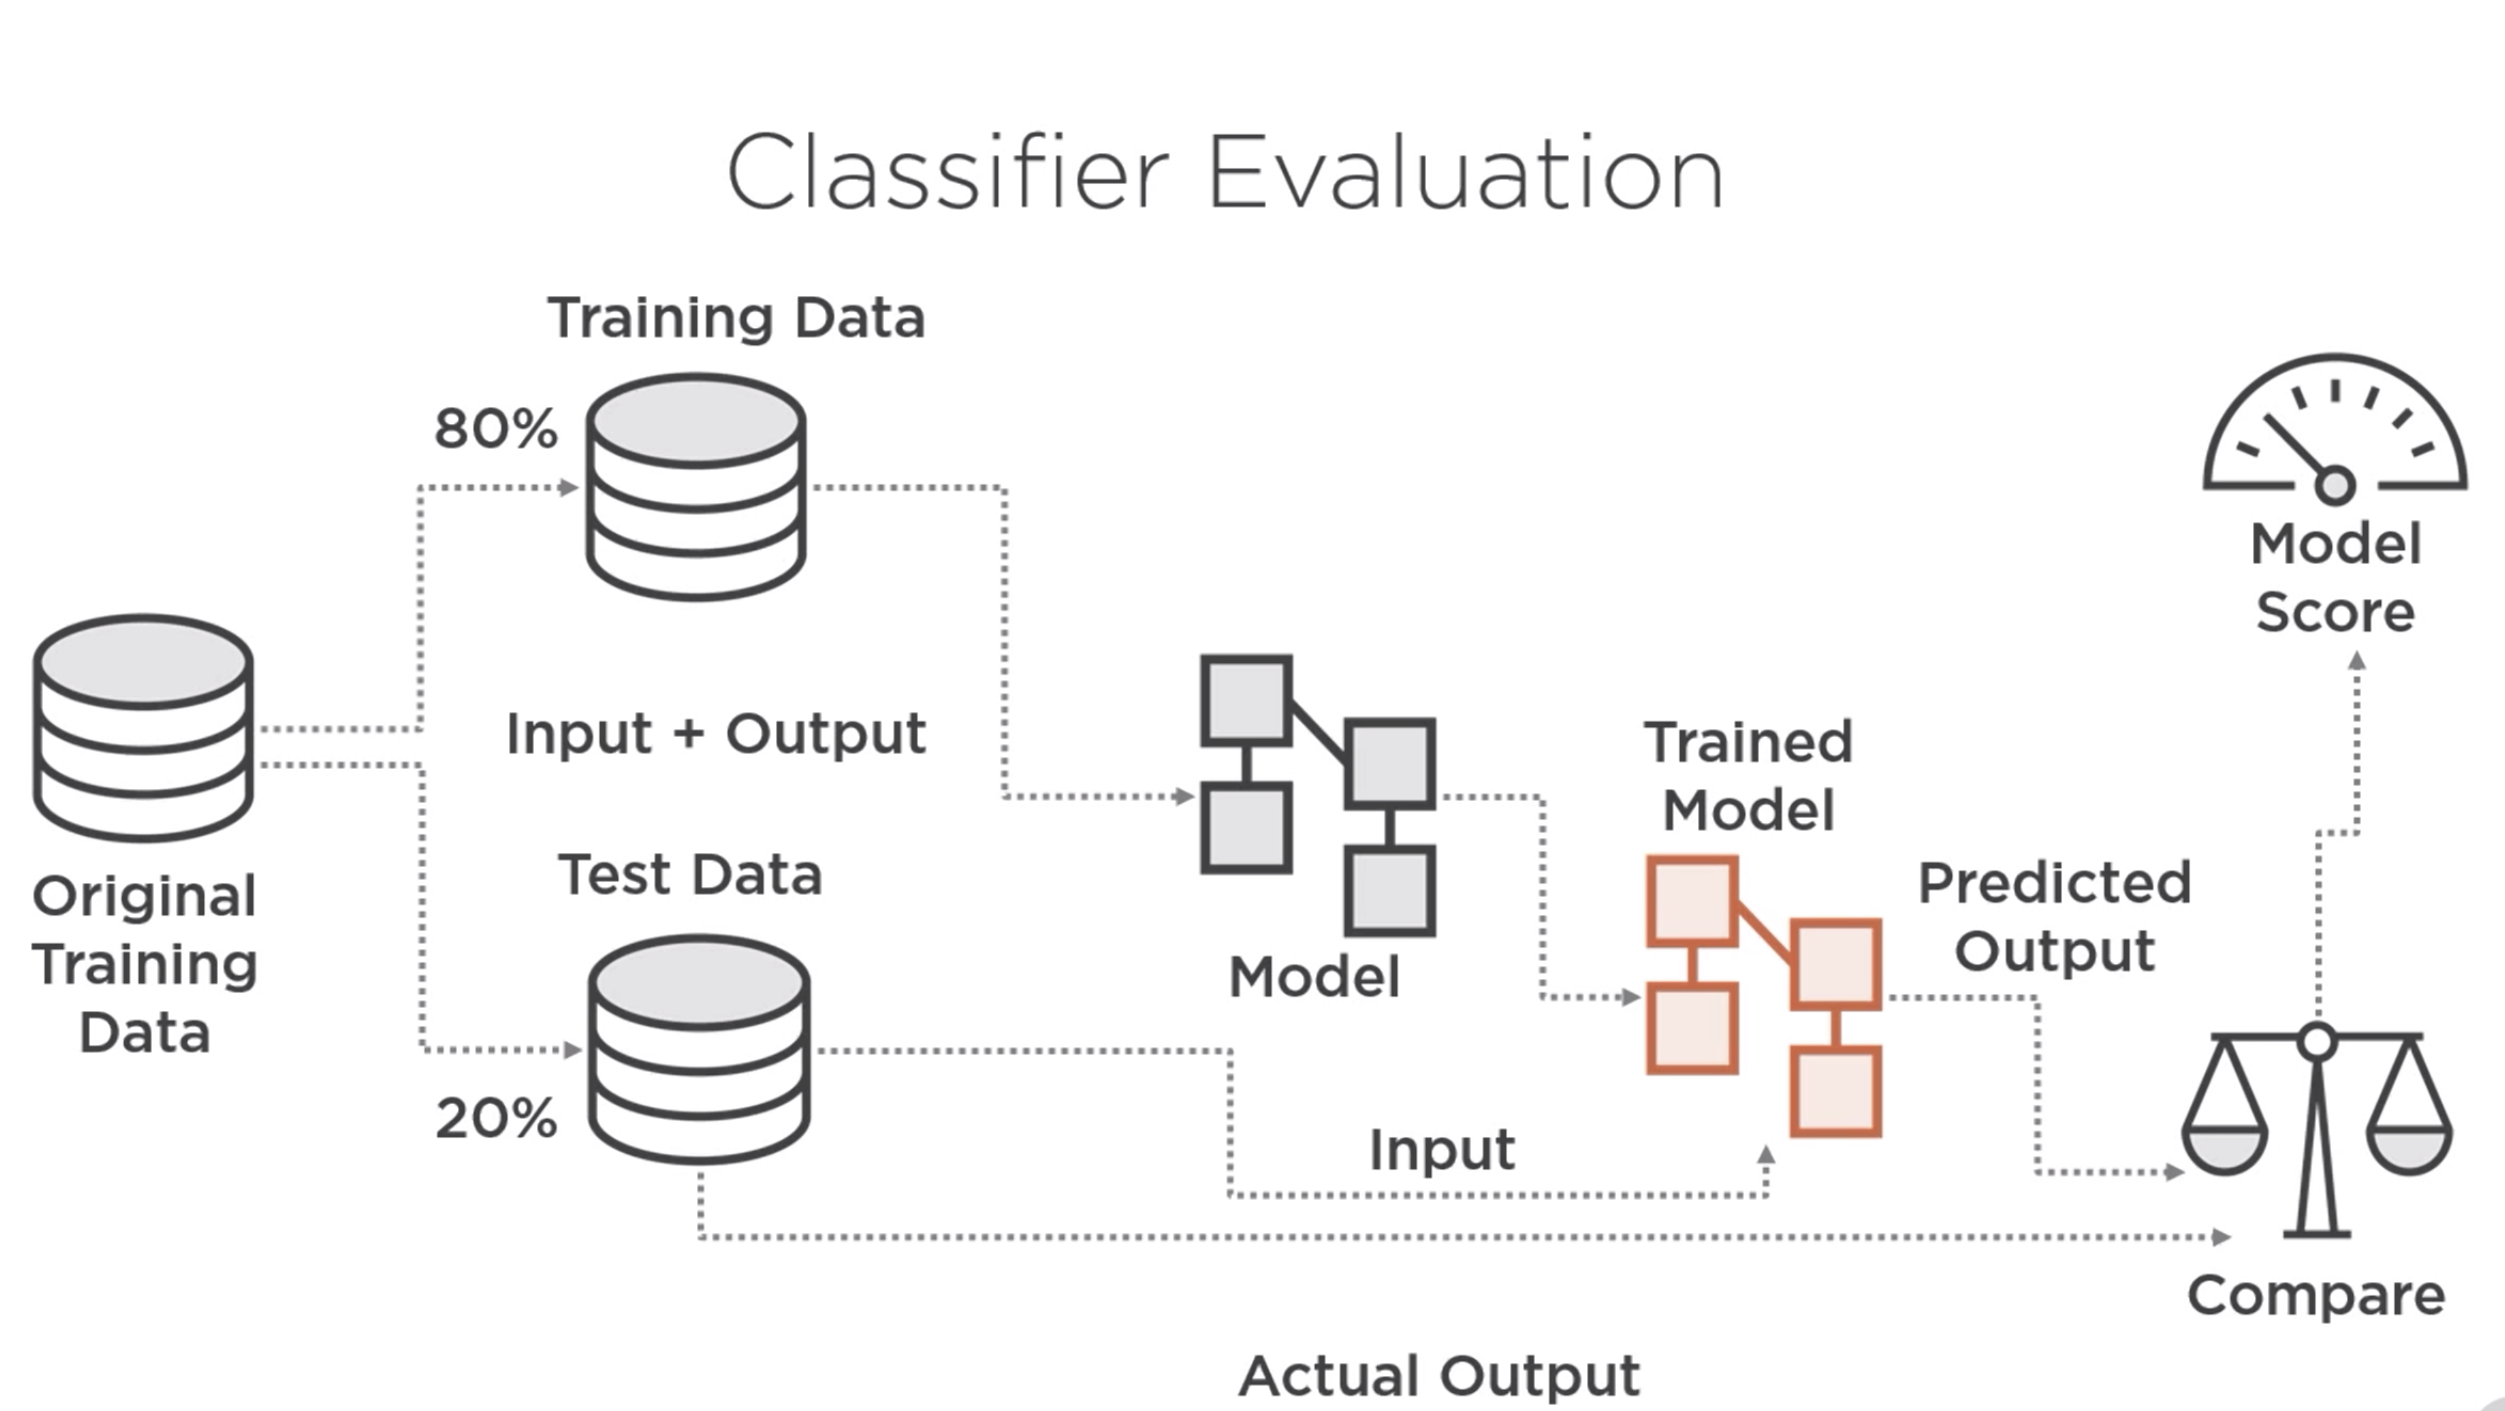
   



## Baseline Model

- First Step - Create baseline Model which does not use the machine leanring at all - It is a best practice to do that. It will help to compare our machine learning model. If Machine leanring model gives the better result then it makes sense to build machine learning model other wise it does not make sense at all. 

#### Baseline Model for classification 

- Always give the output as majority class

|Class | Count |
|:---:|:---:|
|1|60|
|0|40|

If training data set has the majority class 60 percent as 1. Then our model will always return class 1 as a result.
Baseline Model Accuracy = 60 / (60+40) = 0.6  = 60%

Predictive model should have better performance than baseline otherwise it does not make sense to build the machine learning model. 



### Building Baseline Models

In [29]:
import pandas as pd
import numpy as np
import os

In [30]:
# set the path of processed data
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
train_data_path = os.path.join(processed_data_path, 'train.csv')
test_data_path = os.path.join(processed_data_path, 'test.csv')

In [31]:
train_df = pd.read_csv(train_data_path, index_col='PassengerId')
test_df = pd.read_csv(test_data_path, index_col='PassengerId')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-null int64
Title_Mrs             891 non-

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 32 columns):
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-null int64
Title_Officer         418 n

### Data Preparation 

In [34]:
X = train_df.loc[:,'Age':].as_matrix().astype('float')
y = train_df['Survived'].ravel()

#ravel is numpy fuction which creates flaten one dimentional array
# as_matix creates a matrix and astype float change datatype of all the value to float


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
print(X.shape, y.shape)

(891, 32) (891,)


 **As a best practice we use upper case letter for the Matrix and lower case letter for the one dimentional array.**

In [37]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 32) (712,)
(179, 32) (179,)


In [38]:
# Average survival in train and test 
print(f"Mean Survival in train : {np.mean(y_train)}")
print(f"Mean Survival in test : {np.mean(y_test)}")      

Mean Survival in train : 0.38342696629213485
Mean Survival in test : 0.3854748603351955


- First observation: Survival rate in both train and test data are almost same that means training and test data. We want positive cases to be distributed evenly in both trainig and test data. 
- Second obeservation: Only 39 % of data are positive cases and 61% are the negative classes. In this scenario 39 vs 61 is still good scenario however in some case like marketing - Attract, Engage and Convert ratio can be very small. 2-3% cutomer can be attracted. This highly imbalance problem has different approach to build the model.
### Explore imbalance problem on own - Important

### Baseline model creation

In [10]:
import sklearn

In [16]:
sklearn.__version__

'0.21.3'

In [11]:
from sklearn.dummy import DummyClassifier

In [12]:
# create Model
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)

# Most frequest will output the majority class. 

In [13]:
# train model
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [14]:
print(f"Score for baseline Model: {model_dummy.score(X_test, y_test)}")

Score for baseline Model: 0.6145251396648045


In [15]:
# performance matrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [16]:
print(f"Accurancy for baseline model: {accuracy_score(y_test, model_dummy.predict(X_test))}")

Accurancy for baseline model: 0.6145251396648045


In [17]:
print(f"Confusion Matrix for baseline model: {confusion_matrix(y_test, model_dummy.predict(X_test))}")

Confusion Matrix for baseline model: [[110   0]
 [ 69   0]]


In [18]:
print(f"Precision for baseline model: {precision_score(y_test, model_dummy.predict(X_test))}")
print(f"Recall for baseline model: {recall_score(y_test, model_dummy.predict(X_test))}")

Precision for baseline model: 0.0
Recall for baseline model: 0.0


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression Model

In [19]:
#import function
from sklearn.linear_model import LogisticRegression

In [20]:
# Create model
model_lr_1 = LogisticRegression(random_state=0)

In [21]:
# train model
model_lr_1.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Evaluate model
print(f"Score for logistic regression version-1: {model_lr_1.score(X_test, y_test)}")

Score for logistic regression version-1: 0.8324022346368715


In [24]:
# Performance Metrics
# Accuracy
print(f"Accurancy for baseline model: {accuracy_score(y_test, model_lr_1.predict(X_test))}")
# Confusion matrix
print(f"Confusion Matrix for baseline model: {confusion_matrix(y_test, model_lr_1.predict(X_test))}")
# Precision
print(f"Precision for baseline model: {precision_score(y_test, model_lr_1.predict(X_test))}")
# Recall
print(f"Recall for baseline model: {recall_score(y_test, model_lr_1.predict(X_test))}")

Accurancy for baseline model: 0.8324022346368715
Confusion Matrix for baseline model: [[95 15]
 [15 54]]
Precision for baseline model: 0.782608695652174
Recall for baseline model: 0.782608695652174


In [25]:
#Model Coefficients
model_lr_1.coef_

array([[-0.02842268,  0.00455451, -0.50009089,  0.6178132 , -0.81392331,
         0.12845079, -0.17281789, -0.39317834,  0.52159979,  1.09941224,
         0.40341217, -0.18345052, -0.30036043,  0.96533486,  0.48256744,
        -0.34483448,  0.28089598,  1.21761328,  0.56363966, -1.44586305,
         1.07245548, -0.11273708, -0.47293646,  0.16255648,  0.24716933,
         0.28009428,  0.41324773,  0.49183528,  0.46198829,  0.14924424,
         0.37283516,  0.73023265]])

Coefficients are also called model weights or parameters


### Kaggle Submission

In [39]:
# Converting to the matrix
test_X = test_df.as_matrix().astype('float')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [28]:
print(test_X.shape)

(418, 33)


In [40]:
# get predictions
predictions = model_lr_1.predict(test_X)

In [41]:
# Create submission data frame
df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived': predictions})

In [42]:
df_submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [43]:
# Submission file
submission_data_path = os.path.join(os.path.pardir, 'data', 'external')
submission_file_path = os.path.join(submission_data_path, '01_logisticRegression.csv')

In [44]:
df_submission.to_csv(submission_file_path, index = False)

In [46]:
# Write a function to submit the file
def get_submission_file(model, filename):
    # Converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    # get predictions
    predictions = model.predict(test_X)
    # Create submission data frame
    df_submission = pd.DataFrame({'PassengerId' : test_df.index, 'Survived': predictions})
    # Submission file
    submission_data_path = os.path.join(os.path.pardir, 'data', 'external')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index = False)
    

In [47]:
Building and Evaluating Predictive Models Part 1get_submission_file(model_lr_1,'01_logisticRegression.csv')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Building and Evaluating Predictive Models Part 2

### Model Tuning
    - Underfitting vs Overfitting
    - Regularization
    - Hyperparameter tuning
    - Cross Validation
    
### Feature Engineering
    - Feature Normalization
    
### Model Persistence
### API

#### Python tools
    - Numpy
    - Pandas
    - Scikit-Learn
    - Pickle
    - Flask
    
   

### Underfitting vs Overfitting

 - **Underfitting**: Scenario where model can't learn the pattern in the training data

 - **Overfitting**: Scneario where model has created very complex decision boundary but able to separate all the point. From accuracy perspective one can say that this is the great model as we are able to separate two classifications.  This is not an ideal scenario. Here model has simply memorized the training data and adjusted itself too much according to the training data. Such model does not work in the unseen data and it has poor generalization. 

Ways to avoid **Overfitting**
 - **Regularization**: It helps the overfitting problem by reducing the complexity of the model such that its balanced so that it will not be underfit and overfit. 
 
 #### Regularization
  - Created Moded : model = LogisticRegression(random_state=0)
  - Train Model: model.fit(X_train, y_train)
  - Score:  model.score(X_test, y_test)
  - Coefficients(Model Parameters): model.coef_
  
We have specified only one parameter random_state while creating LogisticRegression model. There are several other parameters. 

One of the parameter is **C=1.0**. It is a regularization parameter for the logistic regression. If the C value to be too high then model will overfit and if we setup C value low then model can be under fit. 

Other important parameter is **penalty='l2'**, L1 and L2 are two values, L2 is by default. 
All these parameters are different knobs. If one does not choose these carefully then it may result in overfit or under fit. These knobs or parameters are called **hyperparameters**. 

Hyperparameters tuning is very important task of the Model tuning. 
  
Most commonly used Hyperparameter optimized technique. 

#### GridSearch

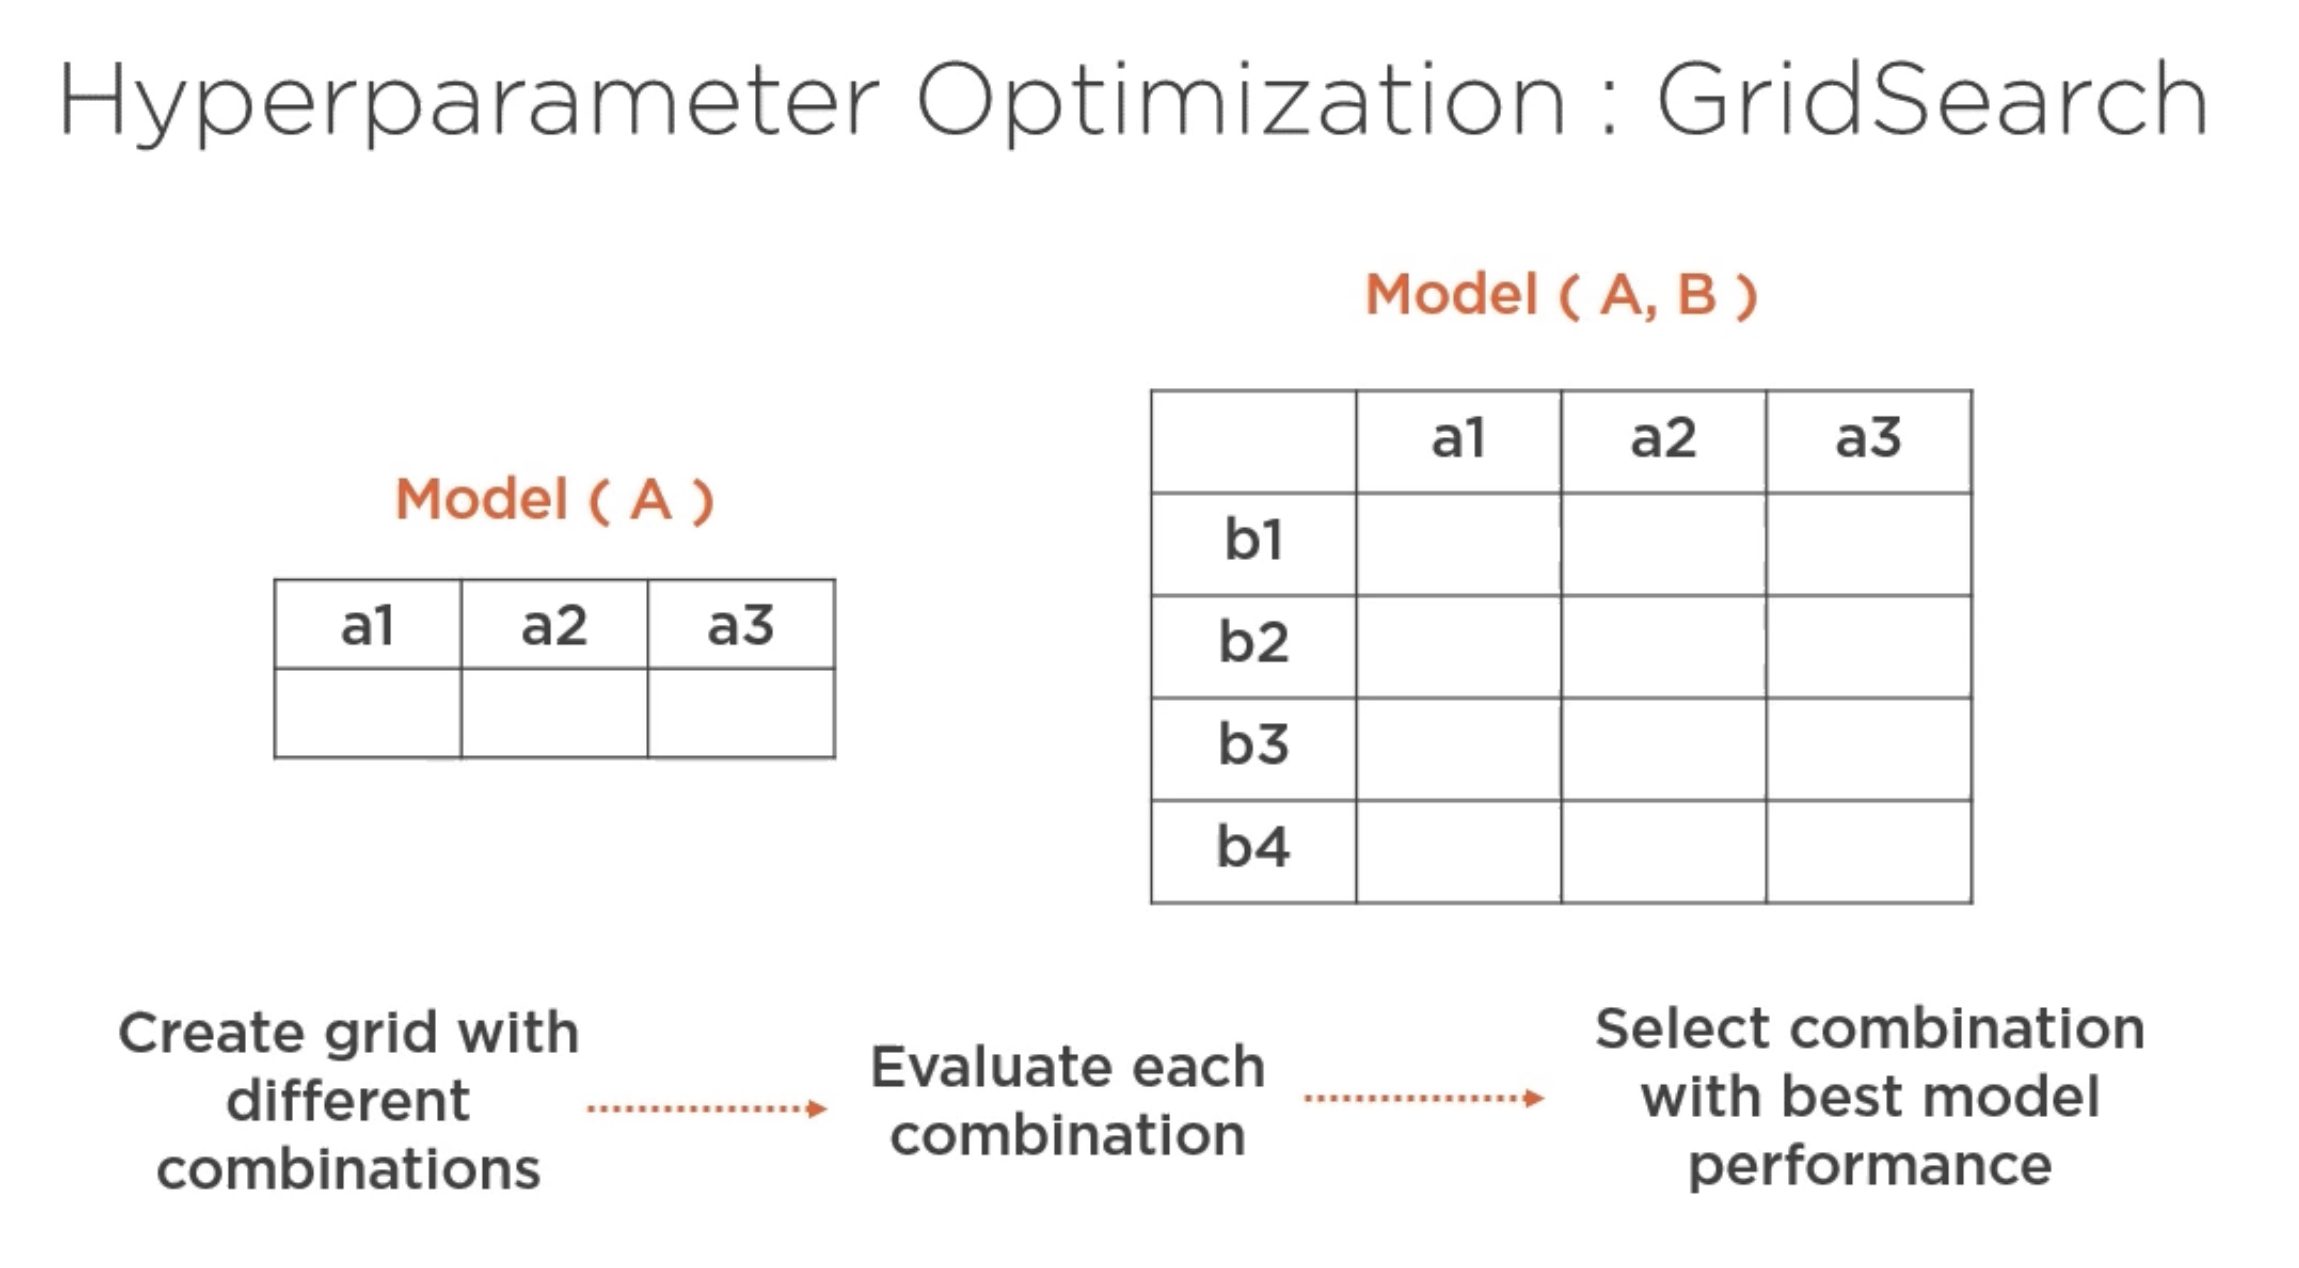

***Hyper parameter tuning is done through Cross validation***


### Cross-Validation 
We split the data into three parts. Training Set, Crossvalidation set and Test Set. We pass the training set to train the model and then we use crossvalidation set to evaluation the model, each set gives different scores, among them we find out which one is the best. Then test set is used to test the model. 

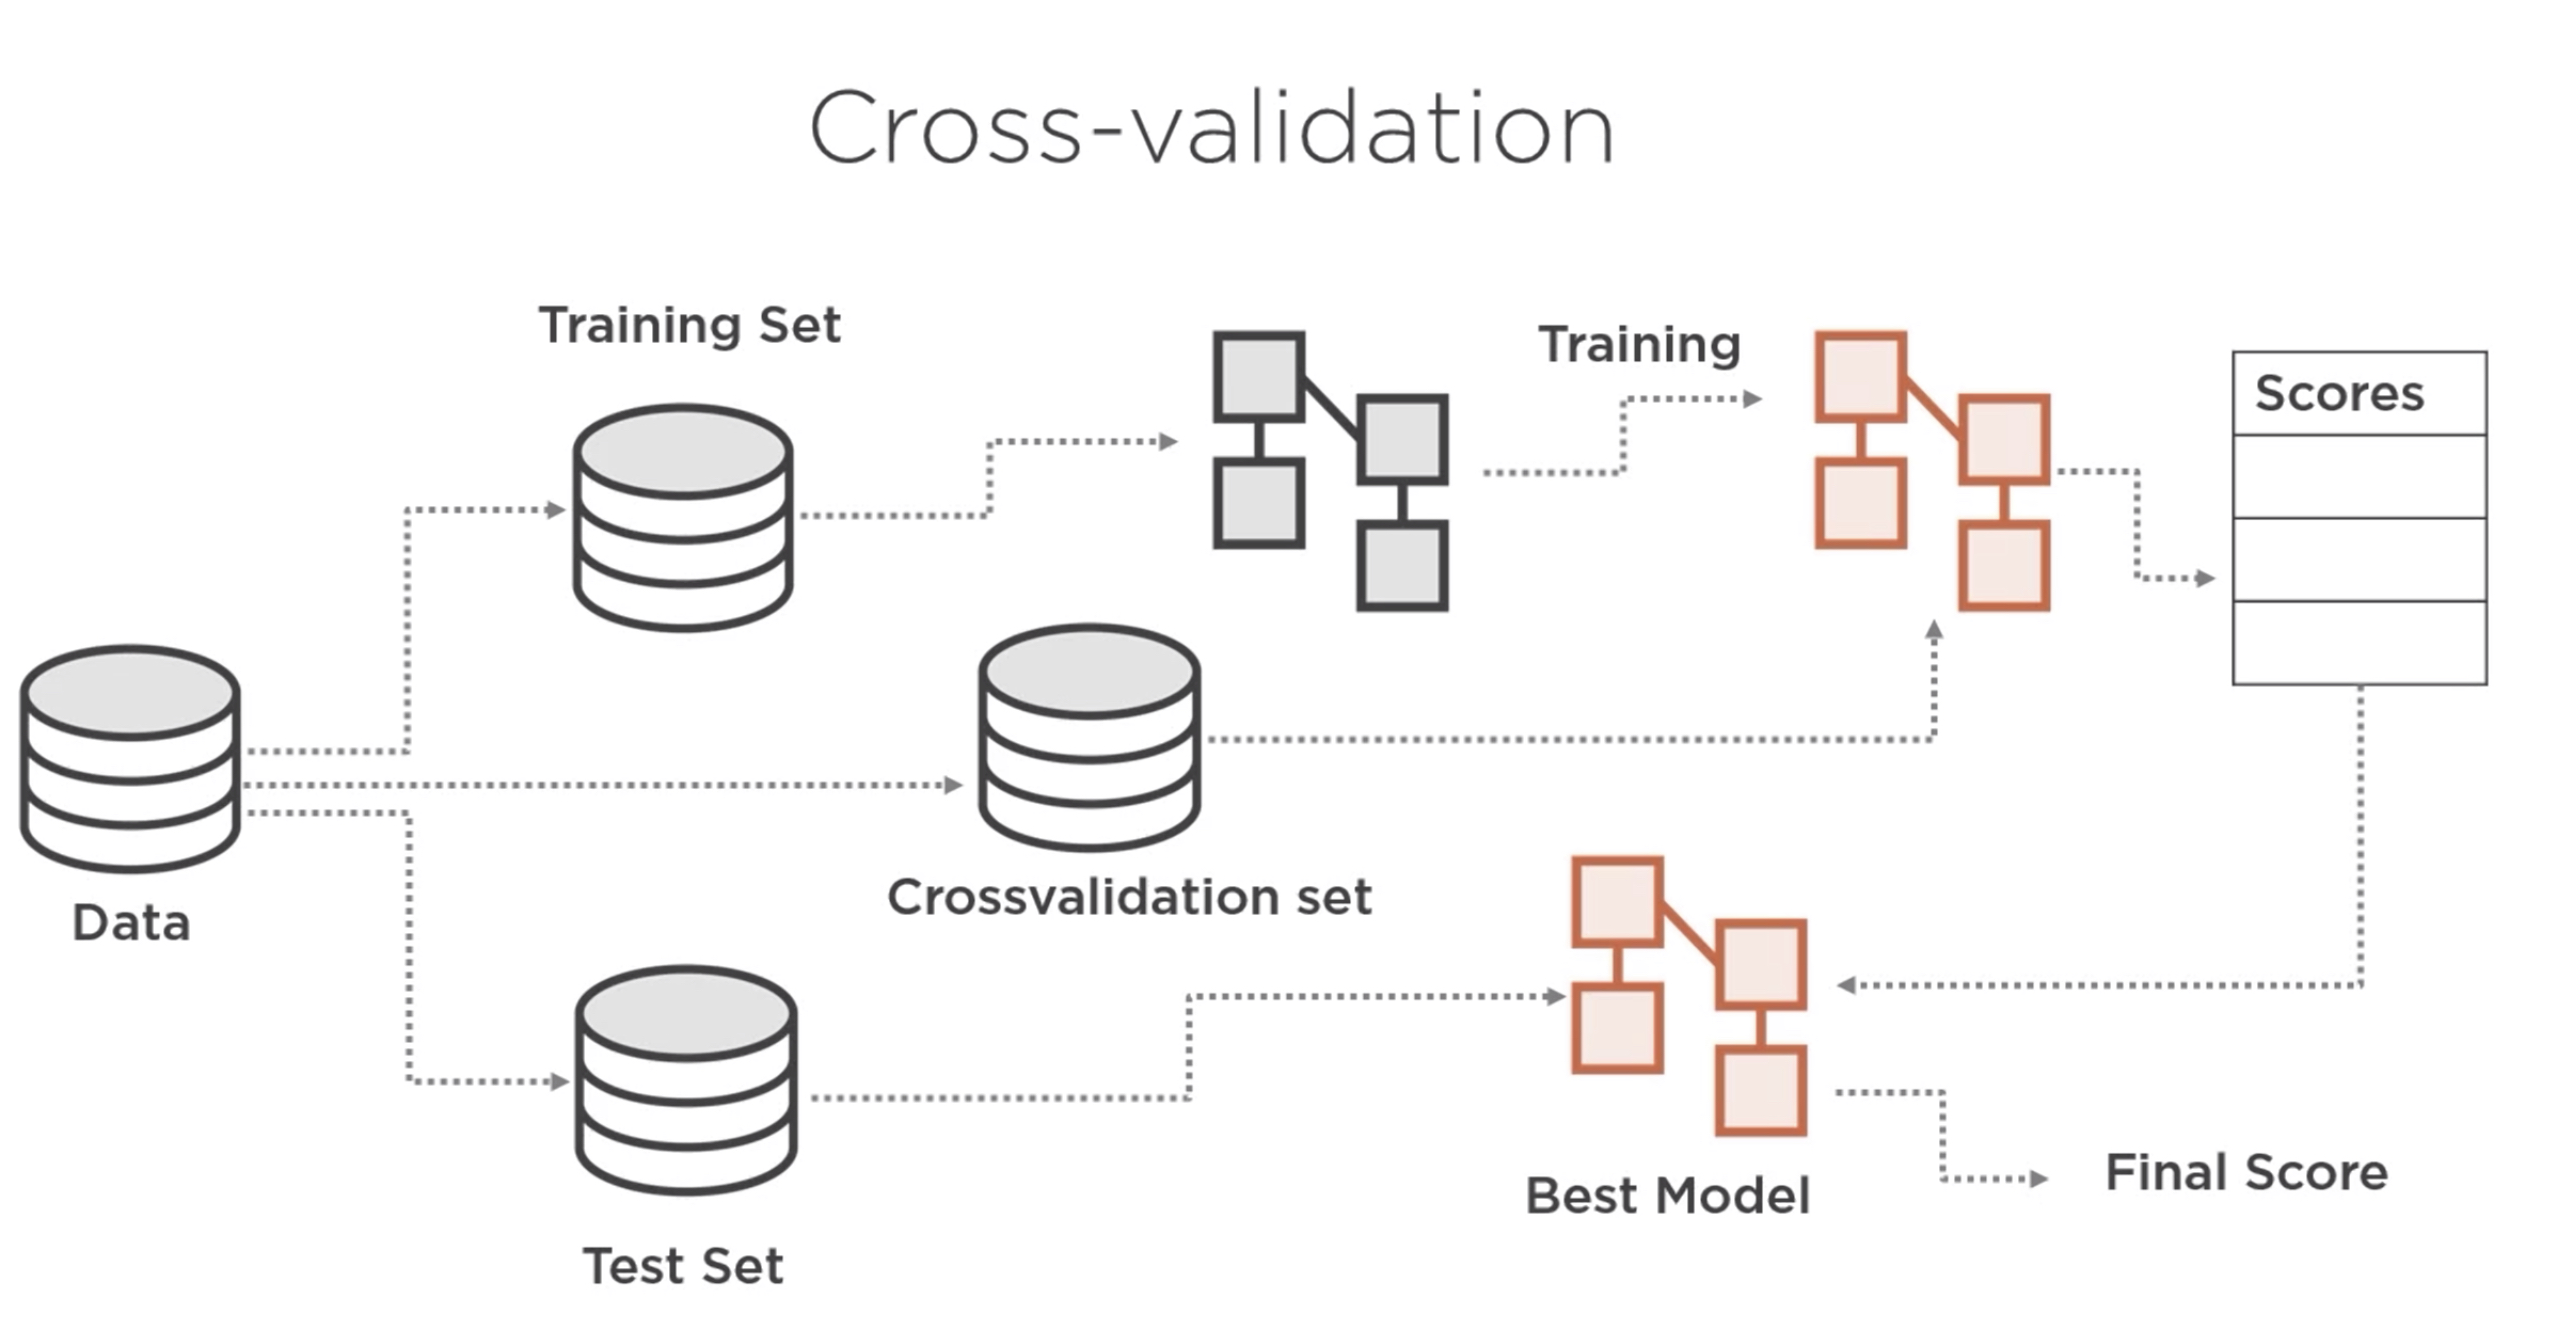

### K-Fold Cross-Validation

**K=3, 3-Fold**

First you start with your training dataset. We devide the training set in 3 parts. We use first portion to test the model performance and other 2 portaion to train the model. 

we repeat above steps using different partition for test and train set. We trake mean score and check standard davition to see how each score is different from the mean scrore. 

### Hyperparameter optimization using GridSearchCV

In [48]:
# base model
model_lr = LogisticRegression(random_state=0)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1', 'l2']}
clf = GridSearchCV(model_lr, param_grid=parameters, cv=3)

#parameters are the values we want to try for grid search. cv value is 3 it will perform 3 fold validation. 

In [51]:
clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [53]:
print(f"Best Score: {clf.best_score_}")

Best Score: 0.8328651685393258


In [54]:
# Evaluate model
print(f"Score for logistic regression version 2: {clf.score(X_test, y_test)}")

Score for logistic regression version 2: 0.8268156424581006


### Making third submission to kaggle

In [55]:
get_submission_file(clf, '03_lr.csv')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### Feature Normalization
- Many Machine learning algorithms work better if features in the data are on the same scale. 
- Age: 0.4 to 80, Fare: 0 to 512, FamilySize: 1-11
    Features with different scale may impact the performance of the model. So its highly important to normalize       the feature by performing feature scalling before we traint he model. 
- Common types of Normalization:
    1. Scale type 1 : 0 to 1 (Very commonly used scale)
    2. Scale type 2: -1 to 1 (Very commonly used scale but not applicable for the feature where negative values          does not make sense.)
    3. Feature Standardization: It is used when the model does not bother only about the range but also about the distribution. If mean and standard deviation is very different then we standardized the feature in such way that mean is 0.0 and Variance = 1.0. This standardization can boost model performance. 

## Feature Normalization and Standardization

In [56]:
#import
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Feature Normalization

In [67]:
# feature normalization
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [68]:
X_train_scaled[:,0].min(), X_train_scaled[:,0].max()

(0.0, 1.0)

In [69]:
# normalize test data
X_test_scaled = scaler.transform(X_test)

In [70]:
def createModel(X, y):
    model_lr = LogisticRegression(random_state=0)
    parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1', 'l2']}
    clf = GridSearchCV(model_lr, param_grid=parameters, cv=3)
    clf.fit(X, y) 
    return clf
    
    

In [71]:
clf = createModel(X_train_scaled, y_train)
clf.best_score_

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.827247191011236

In [72]:
# Evaluate model
print(f"Score for logistic regression version 2: {clf.score(X_test_scaled, y_test)}")

Score for logistic regression version 2: 0.8212290502793296


#### Feature Standardization

In [73]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
clf = createModel(X_train_scaled, y_train)
clf.best_score_

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.8132022471910112

In [75]:
# Evaluate model
print(f"Score for logistic regression version 2: {clf.score(X_test_scaled, y_test)}")

Score for logistic regression version 2: 0.8435754189944135


In [76]:
get_submission_file(clf, '05_lr.csv')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Model Persistence

It is a very powerful technique where we take our trained model and write or persist to the disk. We can use this model whenever you want. We do not have to trained the model everytime we call model. We can share the model with others by sharing the data. 
We can use the persistent model to creat the API. 

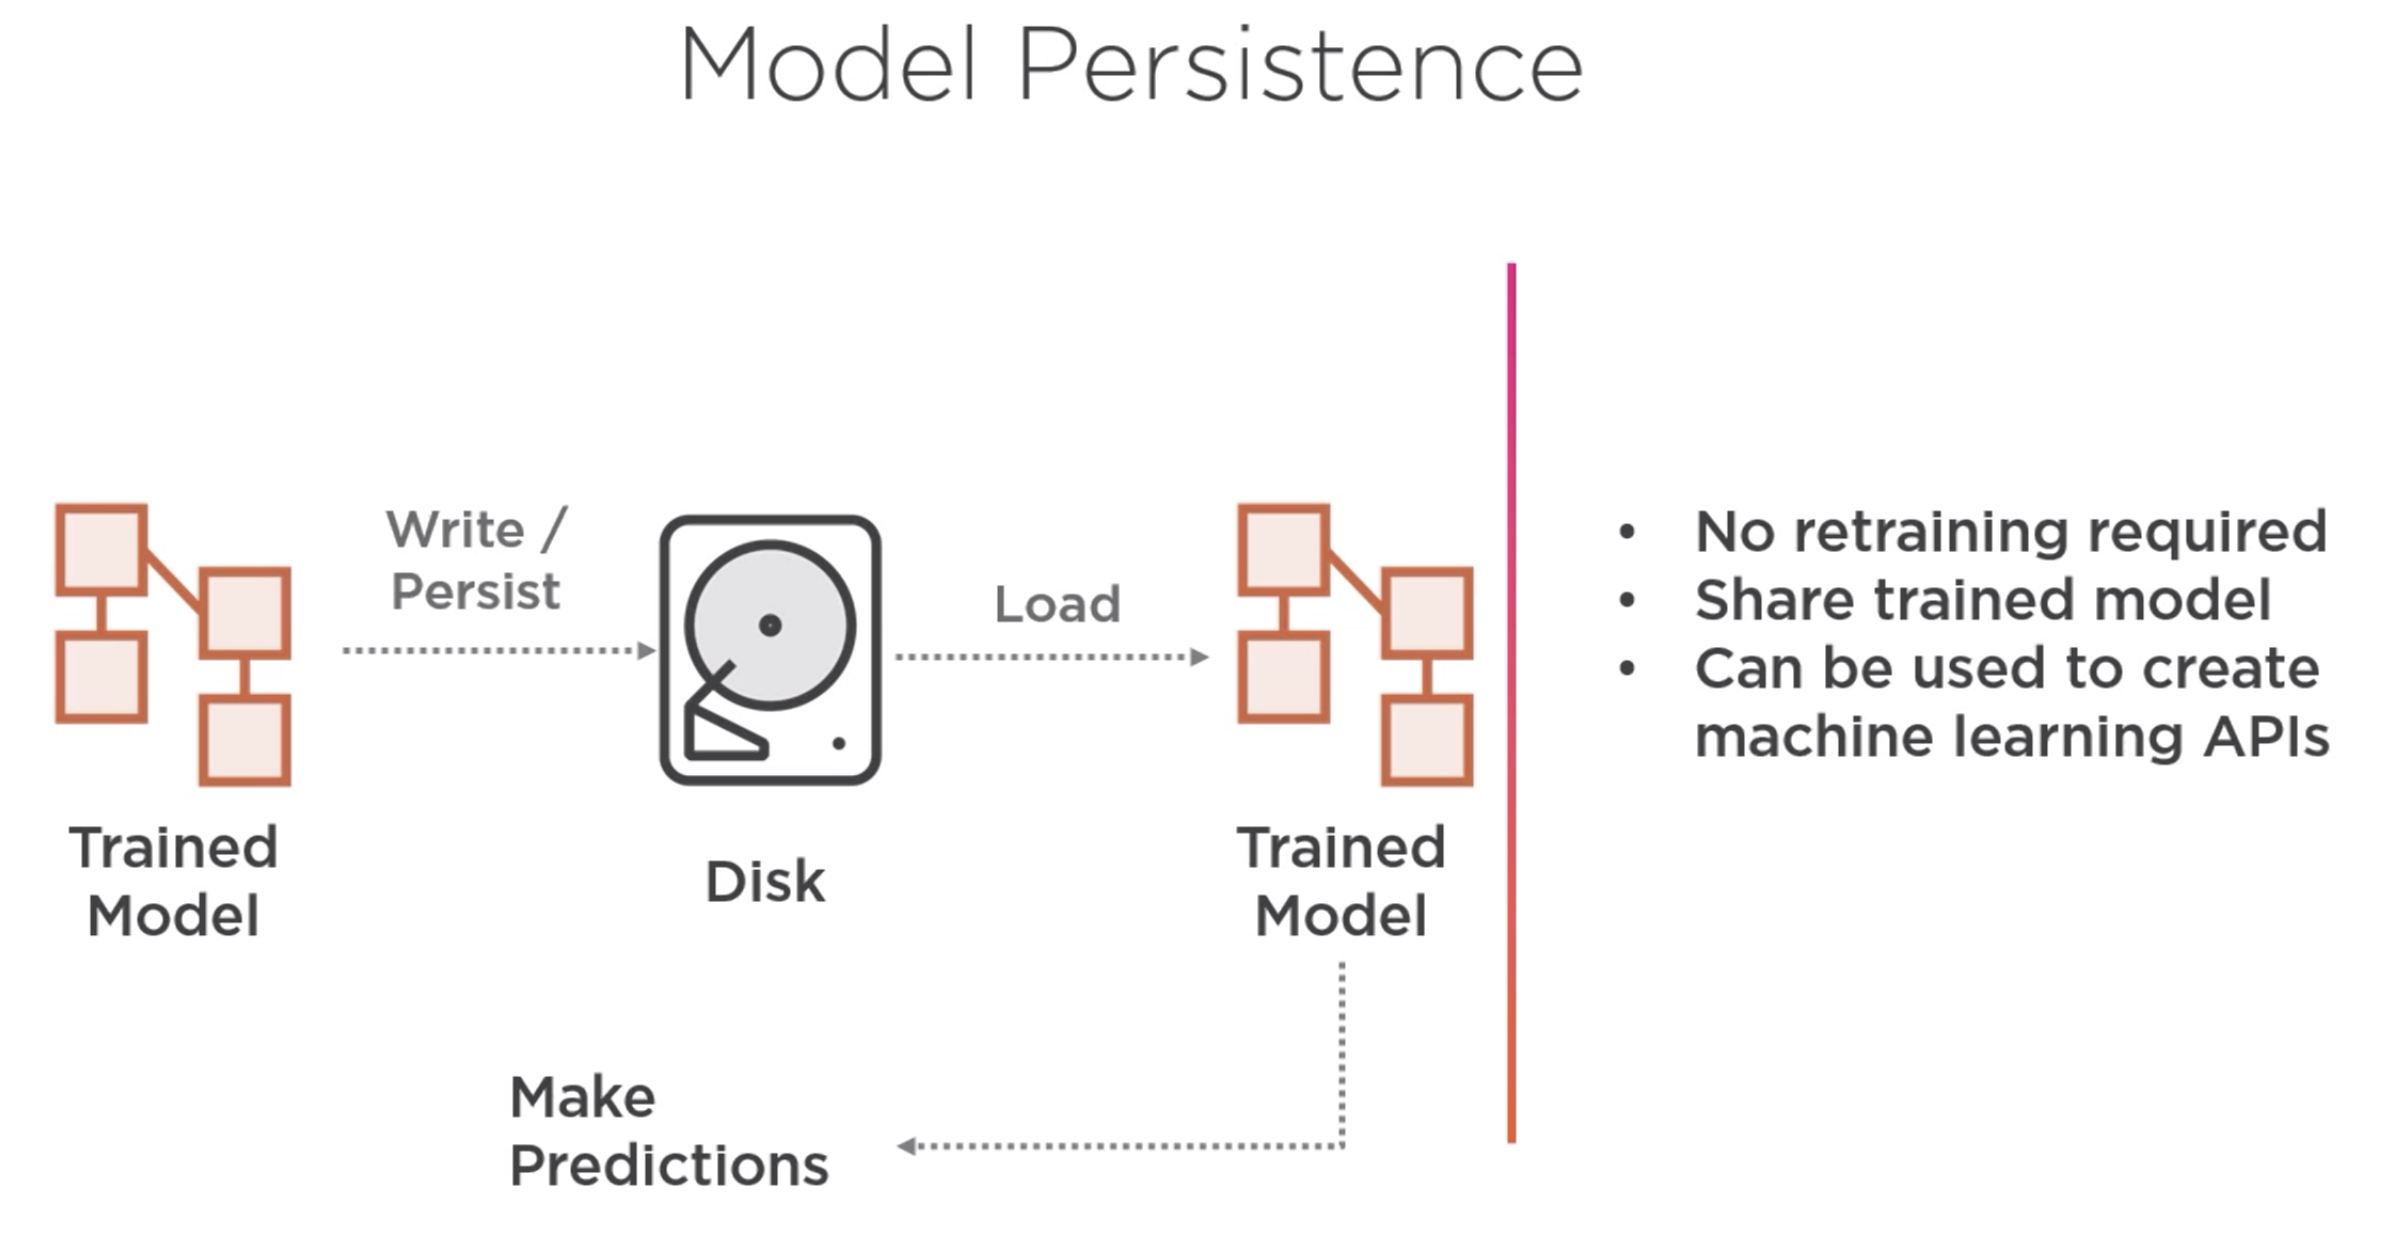

In [77]:
# Model Persistence using pickle library
import pickle

In [87]:
#create the file path
model_file_path = os.path.join(os.path.pardir, 'models', 'lr_model.pkl')
scaler_file_path = os.path.join(os.path.pardir, 'models', 'lr_scaler.pkl')

In [88]:
#open the files to write in write mode, wb is to write in binary format
model_file_pickle = open(model_file_path, 'wb')
scaler_file_pickle = open(scaler_file_path, 'wb')

In [89]:
#persist the model and scaler
pickle.dump(clf, model_file_pickle)
pickle.dump(scaler, scaler_file_pickle)

In [90]:
# Close the file
model_file_pickle.close()
scaler_file_pickle.close()

#### Load the persisted file

In [92]:
# open the files in read mode
model_file_pickle = open(model_file_path, 'rb')
scaler_file_pickle = open(scaler_file_path, 'rb')

# load files
clf_loaded = pickle.load(model_file_pickle)
scaler_loaded = pickle.load(scaler_file_pickle)

# Close the files
model_file_pickle.close()
scaler_file_pickle.close()


In [93]:
clf_loaded

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
scaler_loaded

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
# transform the test data using loaded scaler object
X_test_scaled = scaler_loaded.transform(X_test)

print(f"score for persisted logistic regression : {clf_loaded.score(X_test_scaled, y_test)}")

score for persisted logistic regression : 0.8435754189944135
